# Clustering using `scikit-learn`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, cluster, metrics
from sklearn.pipeline import Pipeline

from scipy.spatial.distance import cdist, pdist

In [2]:
IRIS_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data'
var_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Read in the Iris dataset.

In [3]:
iris = pd.read_csv(IRIS_URL, header=None, names=var_names)

Separate predictors and outcome into different DataFrames.

In [4]:
X = iris.drop('species', axis=1)
y = iris.species

Perform $k$-means clustering with 3 clusters and retrieve cluster assignments.

In [5]:
kmeans = cluster.KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

Compare cluster assignments to the outcome.

In [6]:
pd.crosstab(y, labels)

col_0,0,1,2
species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,14,36


Produce a box plot of petal length grouped by cluster assignment.

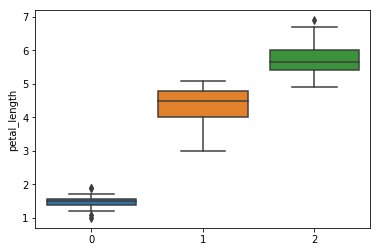

In [7]:
sns.boxplot(labels, X['petal_length'])

Apply the elbow method with 1-10 clusters.

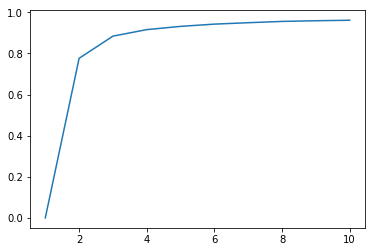

In [8]:
kmeans_models = [cluster.KMeans(n_clusters=k).fit(X) for k in range(1, 11)]
centroids = [model.cluster_centers_ for model in kmeans_models]
distances = [np.min(cdist(X, centroid), axis=1) for centroid in centroids]
total_ss = np.sum(pdist(X)**2) / len(X)
within_ss = [np.sum(d**2) for d in distances]
between_ss = total_ss - within_ss
plt.plot(range(1, 11), between_ss / total_ss)

Create a pipeline that scales the data and performs $k$-means clustering with 3 clusters, then apply it to the data and retrieve cluster assignments.

In [9]:
kmeans_scaled = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('kmeans', cluster.KMeans(n_clusters=3))
])
labels_scaled = kmeans_scaled.fit_predict(X)

Compare cluster assignments to the outcome.

In [10]:
pd.crosstab(y, labels_scaled)

col_0,0,1,2
species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,39,11
Iris-virginica,0,14,36


Apply affinity propagation clustering on the raw data, and compare cluster assignments to the outcome.

In [11]:
ap = cluster.AffinityPropagation()
labels_ap = ap.fit_predict(X)
pd.crosstab(y, labels_ap)

col_0,0,1,2,3,4,5,6
species,,,,,,,
Iris-setosa,23,27,0,0,0,0,0
Iris-versicolor,0,0,21,25,4,0,0
Iris-virginica,0,0,0,1,15,9,25


Produce a box plot of petal length grouped by cluster assignment.

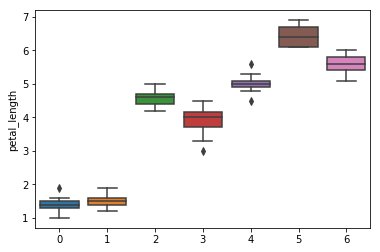

In [12]:
sns.boxplot(labels_ap, X['petal_length'])